In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

In [2]:
frequency = pd.read_csv('frequency_dataset.csv', encoding='utf-8')
print(frequency.shape)
print(frequency.columns)
print(frequency.isna().sum())
frequency.head()

(235932, 8)
Index(['POLICY_NO', 'DATE OF \r\nACCIDENT', 'AGE', 'REG', 'DRV_DLI_AGE',
       'BODY', 'MAKE', 'VEH_SEATS'],
      dtype='object')
POLICY_NO                    0
DATE OF \r\nACCIDENT    176669
AGE                          0
REG                          0
DRV_DLI_AGE                  0
BODY                         0
MAKE                         0
VEH_SEATS                    0
dtype: int64


,POLICY_NO,DATE OF \r\nACCIDENT,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS
0,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0
1,102048936,2015-06-15,31.000000,DUBAI,8.292969,SALOON,TOYOTA,4.0
2,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0
3,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0
4,101509203,NaN,35.219656,DUBAI,36.076109,PICK UP,MITSUBISHI,2.0


In [3]:

frequency.drop_duplicates(
    subset=['POLICY_NO', 'DATE OF \r\nACCIDENT'], inplace=True)
frequency['freq'] = frequency.groupby(
    'POLICY_NO')['DATE OF \r\nACCIDENT'].transform('count')

frequency.drop_duplicates(subset=['POLICY_NO'], inplace=True)
frequency

,POLICY_NO,DATE OF \r\nACCIDENT,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0,2
4,101509203,NaN,35.219656,DUBAI,36.076109,PICK UP,MITSUBISHI,2.0,0
5,101509204,NaN,35.219656,DUBAI,36.076109,SALOON,TOYOTA,4.0,0
6,102048937,2015-05-24,50.000000,DUBAI,17.602834,VAN,HYUNDAI,8.0,1
7,102048938,2015-03-02,26.000000,DUBAI,8.022349,SALOON,MITSUBISHI,4.0,1
...,...,...,...,...,...,...,...,...,...
235927,102153585,NaN,42.000000,ABU DHABI,14.592745,SUV,PEUGEOT,4.0,0
235928,102153586,NaN,69.000000,DUBAI,37.264887,SALOON,BMW,4.0,0
235929,102153588,NaN,35.000000,DUBAI,7.624914,SALOON,CHEVROLET,4.0,0
235930,102153587,NaN,48.000000,ABU DHABI,3.137577,SALOON,TOYOTA,4.0,0


In [4]:
# drop policy no and date of accident
frequency.drop(['POLICY_NO', 'DATE OF \r\nACCIDENT'], axis=1, inplace=True)
frequency.head()

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0,2
4,35.219656,DUBAI,36.076109,PICK UP,MITSUBISHI,2.0,0
5,35.219656,DUBAI,36.076109,SALOON,TOYOTA,4.0,0
6,50.000000,DUBAI,17.602834,VAN,HYUNDAI,8.0,1
7,26.000000,DUBAI,8.022349,SALOON,MITSUBISHI,4.0,1


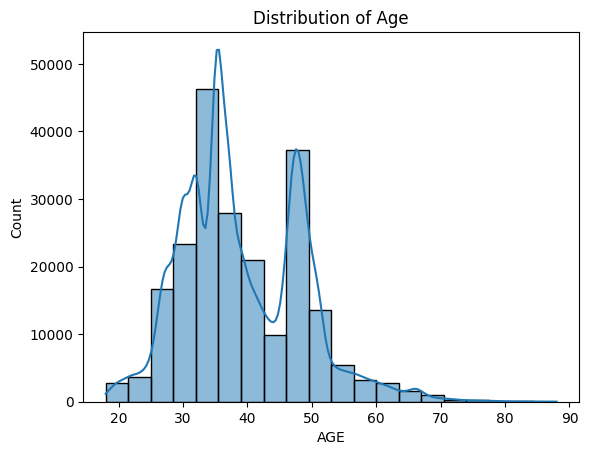

In [5]:
sns.histplot(frequency['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

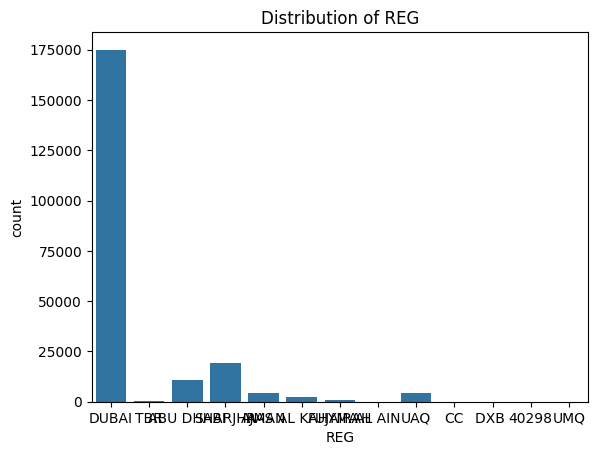

In [6]:
sns.countplot(x='REG', data=frequency)
plt.title('Distribution of REG')
plt.show()

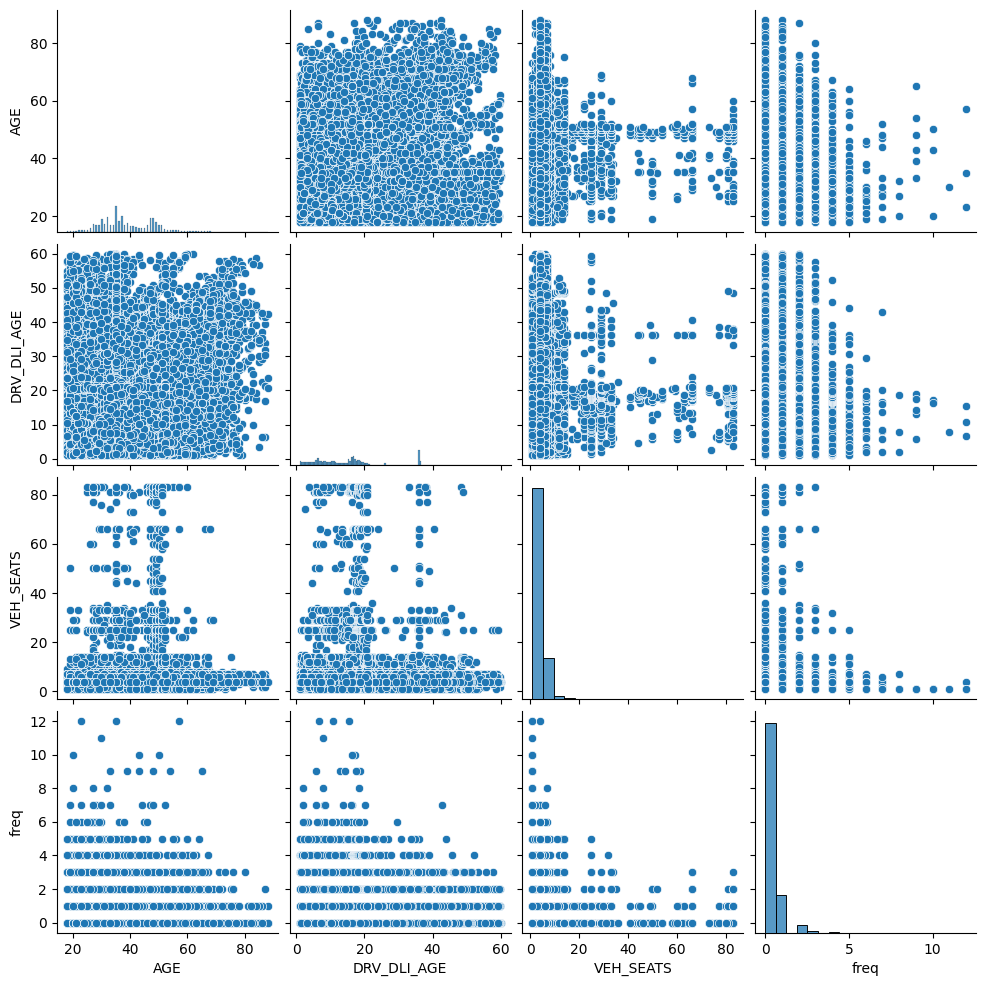

In [7]:
sns.pairplot(frequency[['AGE', 'DRV_DLI_AGE', 'VEH_SEATS', 'freq']])
plt.show()

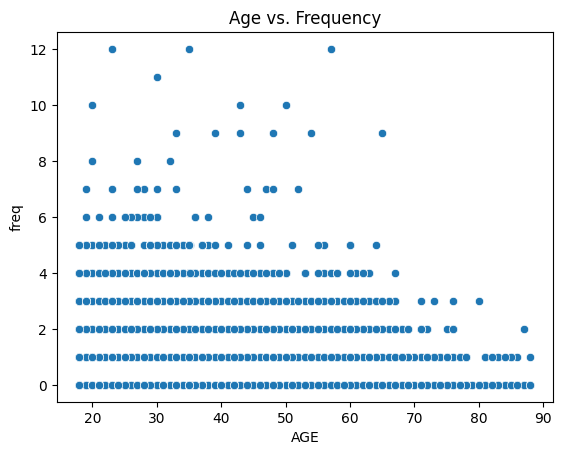

In [8]:
sns.scatterplot(x='AGE', y='freq', data=frequency)
plt.title('Age vs. Frequency')
plt.show()

In [9]:
encoder = LabelEncoder()
encoderColumns = ['REG', 'BODY', 'MAKE']
for i in encoderColumns:
    frequency[i] = encoder.fit_transform(frequency[i])
frequency

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,26.000000,5,8.022349,49,187,4.0,2
4,35.219656,5,36.076109,35,135,2.0,0
5,35.219656,5,36.076109,49,187,4.0,0
6,50.000000,5,17.602834,75,84,8.0,1
7,26.000000,5,8.022349,49,135,4.0,1
...,...,...,...,...,...,...,...
235927,42.000000,1,14.592745,60,143,4.0,0
235928,69.000000,5,37.264887,49,16,4.0,0
235929,35.000000,5,7.624914,49,30,4.0,0
235930,48.000000,1,3.137577,49,187,4.0,0


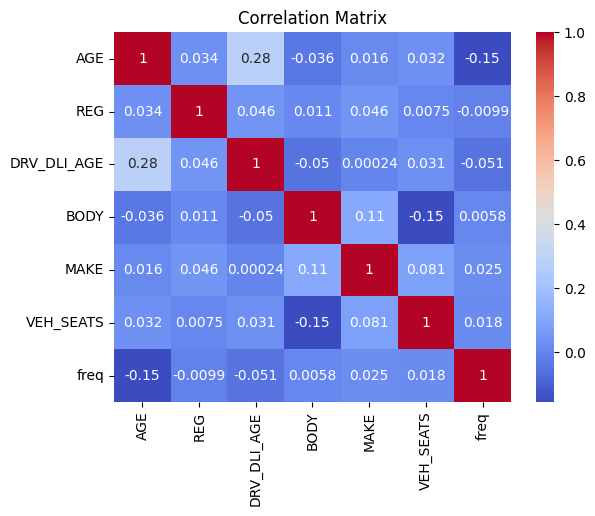

In [10]:
correlation_matrix = frequency.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
frequency[['AGE', 'VEH_SEATS', 'DRV_DLI_AGE', 'freq']] = scaler.fit_transform(frequency[['AGE', 'VEH_SEATS', 'DRV_DLI_AGE', 'freq']])
frequency

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,-1.394732,5,-0.704674,49,187,-0.140198,3.173263
4,-0.416889,5,2.034276,35,135,-0.751391,-0.421369
5,-0.416889,5,2.034276,49,187,-0.140198,-0.421369
6,1.150726,5,0.230690,75,84,1.082189,1.375947
7,-1.394732,5,-0.704674,49,135,-0.140198,1.375947
...,...,...,...,...,...,...,...
235927,0.302240,1,-0.063192,60,143,-0.140198,-0.421369
235928,3.165880,5,2.150339,49,16,-0.140198,-0.421369
235929,-0.440185,5,-0.743476,49,30,-0.140198,-0.421369
235930,0.938604,1,-1.181585,49,187,-0.140198,-0.421369


In [12]:
# correlation_matrix = frequency.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [13]:
# sns.pairplot(frequency[['AGE', 'DRV_DLI_AGE', 'VEH_SEATS', 'REG', 'MAKE' ,'freq']])
# plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Perform data preprocessing steps here

# Split the data into features (X) and target (y)
X = frequency.drop("freq", axis=1)
y = frequency["freq"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights based on the frequency of each class
class_weights = {val: 1 / count for val, count in zip(y.value_counts().index, y.value_counts().values)}

# Set up ranges of values for the parameters you want to iterate over
n_estimators_values = [100,200,300,400,500]
max_depth_values = [5, 10, 15]

best_mse = float('inf')
best_parameters = None

# # Iterate over n_estimators and max_depth values
# for n_estimators in n_estimators_values:
#     for max_depth in max_depth_values:
#         # Create and train the RandomForestRegressor with the current parameter values
#         model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
#         model.fit(X_train, y_train)

#         # Make predictions
#         predictions = model.predict(X_test)

#         # Evaluate the model
#         mse = mean_squared_error(y_test, predictions)

#         # Check if the current parameter values give a better accuracy
#         if mse < best_mse:
#             best_mse = mse
#             best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}

# # Print the best parameters and their corresponding accuracy
# print(f"Best Parameters: {best_parameters}")
# print(f"Best Mean Squared Error: {best_mse}")


In [15]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'y_test' contains the actual values and 'predictions' contains the predicted values
# # You already have these from your RandomForestRegressor model

# # Create an array of indices for the x-axis
# indices = np.arange(len(y_test))

# # Plot actual values
# plt.scatter(indices, y_test, label='Actual', color='blue', alpha=0.7)

# # Plot predicted values
# plt.scatter(indices, predictions, label='Predicted', color='red', alpha=0.7)

# # Add labels and title
# plt.title('Actual vs. Predicted Values')
# plt.xlabel('Data Point Index')
# plt.ylabel('Frequency')
# plt.legend()

# plt.show()


In [16]:
import tensorflow as tf
import keras

# Rest of your code remains unchanged


# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Perform data preprocessing steps here

# Split the data into features (X) and target (y)
X = frequency.drop("freq", axis=1)
y = frequency["freq"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")




Epoch 1/50

4339/4339 [==============================] - 33s 7ms/step - loss: 0.9291 - val_loss: 0.9057
Epoch 2/50
4339/4339 [==============================] - 33s 8ms/step - loss: 0.9108 - val_loss: 0.8833
Epoch 3/50
4339/4339 [==============================] - 33s 7ms/step - loss: 0.9028 - val_loss: 0.8757
Epoch 4/50
4339/4339 [==============================] - 31s 7ms/step - loss: 0.8948 - val_loss: 0.8703
Epoch 5/50
4339/4339 [==============================] - 36s 8ms/step - loss: 0.8896 - val_loss: 0.8648
Epoch 6/50
4339/4339 [==============================] - 26s 6ms/step - loss: 0.8851 - val_loss: 0.8708
Epoch 7/50
4339/4339 [==============================] - 26s 6ms/step - loss: 0.8820 - val_loss: 0.8664
Epoch 8/50
4339/4339 [==============================] - 28s 7ms/step - loss: 0.8799 - val_loss: 0.8556
Epoch 9/50
4339/4339 [==============================] - 27s 6ms/step - loss: 0.8776 - val_loss: 0.8563
Epoch 10/50
4339/4339 [==============================] - 27s 6ms/step